In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import cPickle as pickle
import numpy as np
from numpy.dual import eig
import numpy.linalg as la

In [5]:
from threading import Thread

epoch_range = range(500, 4000, 500)
parameters = [None for epoch in epoch_range]

def load(epoch):
    file_path = 'training-parameters-checkpoints/parameters-iteration-%d' % epoch
    index = epoch / 500 - 1
    parameters[index] = pickle.load(open(file_path, 'rb'))
    
threads = []
for epoch in epoch_range:
    thread = Thread(target=load, args=(epoch,))
    thread.start()
    threads.append(thread)

for thread in threads:
    thread.join()

In [6]:
args = sorted(parameters[0].keys())

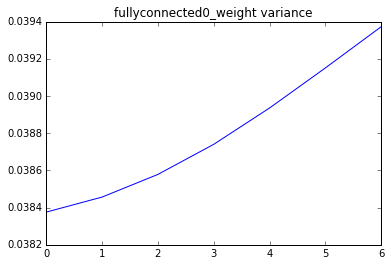

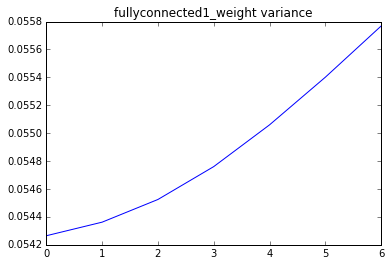

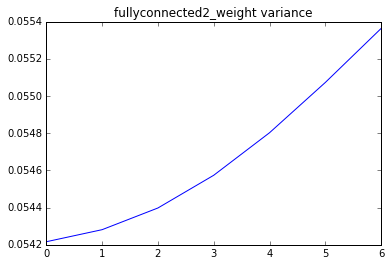

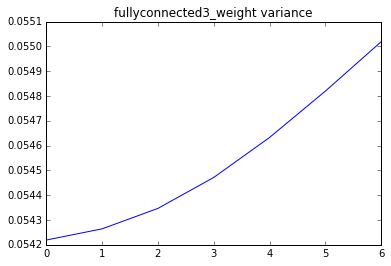

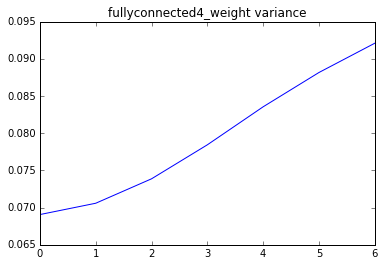

In [7]:
for arg in args:
    if 'weight' not in arg:
        continue
    variances = [np.std(p[arg]) for p in parameters]
    pl.figure()
    pl.plot(range(len(variances)), variances)
    pl.title('%s variance' % arg)